In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\prati\OneDrive\Desktop\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df1 = df.drop(['CustomerId', 'Surname'], axis = 'columns')
df1.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df1['Gender'].replace({'Female':1,'Male':0}, inplace = True)

In [9]:
df1.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df1.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df1['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df2 = pd.get_dummies(data = df1, columns = ['Geography'])
df2.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [16]:
df2.dtypes

RowNumber              int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [17]:
df2[10:]

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
10,11,528,0,31,6,102016.72,2,0,0,80181.12,0,1,0,0
11,12,497,0,24,3,0.00,2,1,0,76390.01,0,0,0,1
12,13,476,1,34,10,0.00,2,1,0,26260.98,0,1,0,0
13,14,549,1,25,5,0.00,2,0,0,190857.79,0,1,0,0
14,15,635,1,35,7,0.00,2,1,1,65951.65,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [19]:
df2.drop(['RowNumber'],axis = 'columns', inplace = True)

In [20]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [22]:
col_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])


In [23]:
df2.head

<bound method NDFrame.head of       CreditScore  Gender       Age  Tenure   Balance  NumOfProducts  \
0           0.538       1  0.324324     0.2  0.000000       0.000000   
1           0.516       1  0.310811     0.1  0.334031       0.000000   
2           0.304       1  0.324324     0.8  0.636357       0.666667   
3           0.698       1  0.283784     0.1  0.000000       0.333333   
4           1.000       1  0.337838     0.2  0.500246       0.000000   
...           ...     ...       ...     ...       ...            ...   
9995        0.842       0  0.283784     0.5  0.000000       0.333333   
9996        0.332       0  0.229730     1.0  0.228657       0.000000   
9997        0.718       1  0.243243     0.7  0.000000       0.000000   
9998        0.844       0  0.324324     0.3  0.299226       0.333333   
9999        0.884       1  0.135135     0.4  0.518708       0.000000   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0             1            

In [24]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [25]:
X = df2.drop(['Exited'], axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [26]:
x_train.shape


(8000, 12)

In [27]:
y_train.shape

(8000,)

In [28]:
x_test.shape

(2000, 12)

In [33]:
model = keras.Sequential([
    keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = 'accuracy'
    )

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5647 - accuracy: 0.7699
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7941
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7941
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4607 - accuracy: 0.7941
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7941
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7941
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7941
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.7941
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.7954
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4290 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8594
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8595
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8597
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8619
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8605
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8614
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.8594
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8594
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8606
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 

In [34]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8620


[0.33692097663879395, 0.8619999885559082]

In [36]:
yp = model.predict(x_test)
yp[:5]

array([[0.10906306],
       [0.05319598],
       [0.00852901],
       [0.01042375],
       [0.02140743]], dtype=float32)

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [42]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]

In [43]:
y_test[:20]

3555    1
4078    0
8445    0
5939    0
5583    0
1656    0
5550    0
1736    0
6297    0
6364    0
6341    0
2802    1
8579    0
2351    1
877     0
5844    0
129     0
7234    0
5704    1
6047    0
Name: Exited, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1610
           1       0.73      0.46      0.57       390

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Text(33.0, 0.5, 'truth')

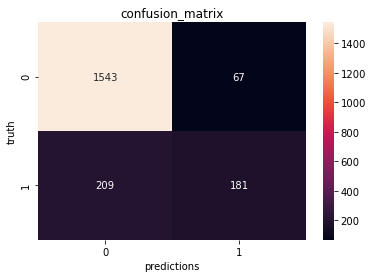

In [49]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)


plt.title('confusion_matrix')
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predictions')
plt.ylabel('truth')

In [50]:
#Precision 0 class
round(1543/(1543+209),2)

0.88

In [51]:
#Precision for 1 class
round(181/(181+67),2)

0.73

In [52]:
#Recall for 0 class
round(1543/(1543+67),2)

0.96

In [53]:
#Recall for 1 class
round(181/(209+181),2)

0.46